In [1]:
import numpy as np
import matplotlib.pyplot as plt

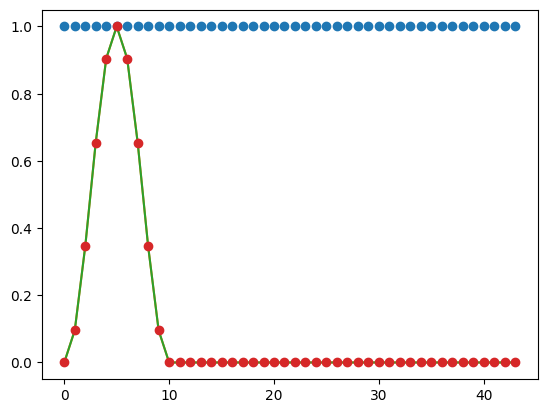

In [27]:
# windowed

P = 10
R = 1
M = P * R + 1
zpd = np.zeros(3*M)
window = np.ones(M)
window = np.concatenate((window, np.ones(3*M)))
plt.plot(window, 'o')
sig = -1 / 2 * np.cos(np.linspace(0, R * 2 * np.pi, M)) + 1 / 2
sig = np.concatenate((sig, np.zeros(3*M)))
windowed = window * sig
#windowed = windowed - np.mean(windowed)
plt.plot(sig)
plt.plot(windowed)
plt.plot(windowed, 'o')

33.095908212922126
3.75


(1024.0, 512.0)

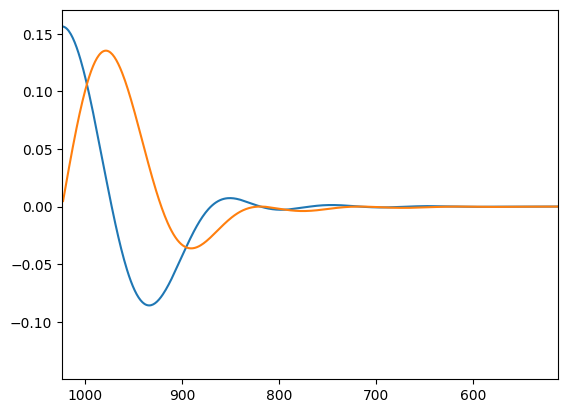

In [28]:
Nfft = 1024
ffted = np.fft.fft(windowed, Nfft, norm="ortho")
plt.plot(np.real(ffted))
plt.plot(np.imag(ffted))
print(np.sum(np.abs(ffted)))
print(np.sum(np.abs(ffted) ** 2))
plt.xlim(Nfft, Nfft//2)

(1024.0, 512.0)

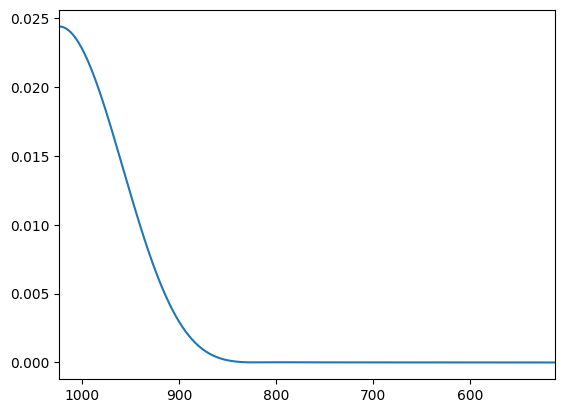

In [29]:
magnitude = np.abs(ffted) ** 2
plt.plot(magnitude)

plt.xlim(Nfft, Nfft//2)


C:\Users\mahdi\AppData\Local\Temp\ipykernel_6308\3438657929.py:1: RuntimeWarning: divide by zero encountered in log10
  logmag = 10 * np.log10(magnitude)


(1024.0, 512.0)

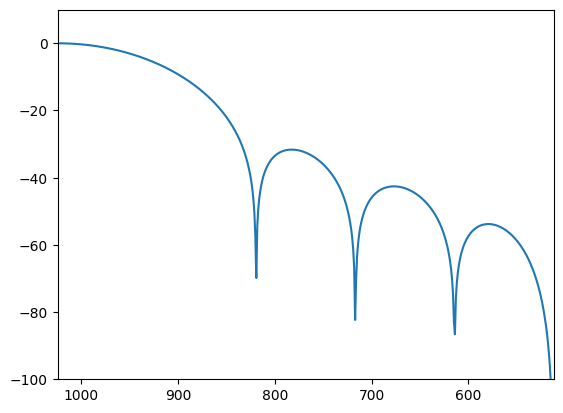

In [30]:
logmag = 10 * np.log10(magnitude)
logmag = logmag - np.max(logmag)
plt.plot(logmag)
plt.ylim(-100, 10)
plt.plot(np.ones(Nfft// 2) * - 13)

plt.xlim(Nfft, Nfft//2)

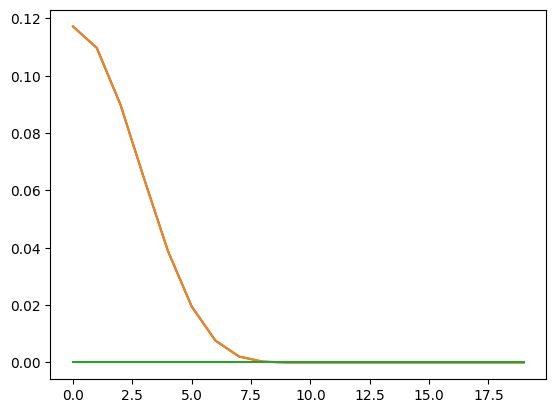

In [31]:
iffted = np.fft.ifft(ffted, Nfft, norm="ortho")
ifftmag = np.fft.ifft(magnitude, Nfft, norm="ortho")
plt.plot(np.abs(ifftmag[0:20]))
plt.plot(np.real(ifftmag[0:20]))
plt.plot(np.imag(ifftmag[0:20]))

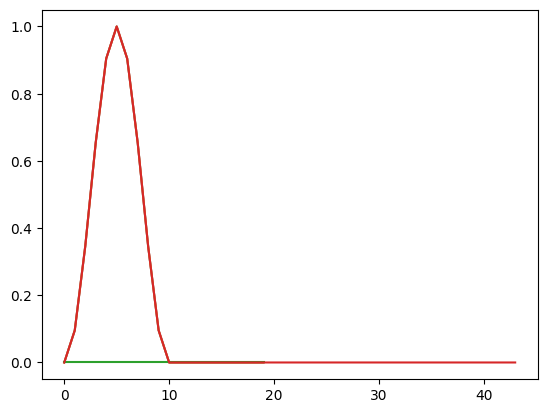

In [32]:
plt.plot(np.abs(iffted[0:20]))
plt.plot(np.real(iffted[0:20]))
plt.plot(np.imag(iffted[0:20]))
plt.plot(windowed)